In [ ]:
import inspect
from Modules.ESP import *
cam_arm = ESP(axis = 1)

print('Available modules:')
print([ m for m in dir(ESP) if not m.startswith('__')])

In [5]:
from Modules.camera import *
cam = Cam()

NameError: name 'tool' is not defined

(1024, 1280, 3)


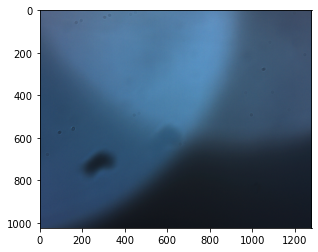

In [28]:
cam.take_image()